### Install Cellpose-SAM


In [14]:
!pip install git+https://www.github.com/mouseland/cellpose.git

  Cloning https://www.github.com/mouseland/cellpose.git to c:\users\admin\appdata\local\temp\pip-req-build-qb88a7hz
  Resolved https://www.github.com/mouseland/cellpose.git to commit 17fb25f40055ec2636aa708dc4cf6625b8b4735d
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


DEPRECATION: Loading egg at c:\users\admin\appdata\local\programs\python\python312\lib\site-packages\underthesea-6.8.4-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Running command git clone --filter=blob:none --quiet https://www.github.com/mouseland/cellpose.git 'C:\Users\ADMIN\AppData\Local\Temp\pip-req-build-qb88a7hz'

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import numpy as np
from cellpose import models, core, io, plot
from pathlib import Path
from tqdm import trange
import matplotlib.pyplot as plt

io.logger_setup() # run this to get printing of progress

#Check if colab notebook instance has GPU access
if core.use_gpu()==False:
  raise ImportError("No GPU access, change your runtime")

model = models.CellposeModel(gpu=True)

creating new log file
2025-12-24 15:30:15,775 [INFO] WRITING LOG OUTPUT TO C:\Users\ADMIN\.cellpose\run.log
2025-12-24 15:30:15,777 [INFO] 
cellpose version: 	4.0.8 
platform:       	win32 
python version: 	3.12.0 
torch version:  	2.7.0+cu118
2025-12-24 15:30:16,509 [INFO] ** TORCH CUDA version installed and working. **
2025-12-24 15:30:16,509 [INFO] ** TORCH CUDA version installed and working. **
2025-12-24 15:30:16,512 [INFO] >>>> using GPU (CUDA)
2025-12-24 15:30:19,805 [INFO] >>>> loading model C:\Users\ADMIN\.cellpose\models\cpsam


Input directory with your images (if you have them, otherwise use sample images):

### Sample images - Human in the loop

In [19]:
from natsort import natsorted
from cellpose import utils
from pathlib import Path

url = "https://drive.google.com/uc?id=1HXpLczf7TPCdI1yZY5KV3EkdWzRrgvhQ"
utils.download_url_to_file(url, "human_in_the_loop.zip")

!unzip human_in_the_loop

train_dir = "human_in_the_loop/train/"
test_dir = "human_in_the_loop/test/"

masks_ext = "_seg.npy"


100%|██████████| 15.5M/15.5M [00:02<00:00, 7.10MB/s]
'unzip' is not recognized as an internal or external command,
operable program or batch file.


### Train new model

In [20]:
from cellpose import train

model_name = "new_model"

# default training params
n_epochs = 100
learning_rate = 1e-5
weight_decay = 0.1
batch_size = 1

# get files
output = io.load_train_test_data(train_dir, test_dir, mask_filter=masks_ext)
train_data, train_labels, _, test_data, test_labels, _ = output
# (not passing test data into function to speed up training)

new_model_path, train_losses, test_losses = train.train_seg(model.net,
                                                            train_data=train_data,
                                                            train_labels=train_labels,
                                                            batch_size=batch_size,
                                                            n_epochs=n_epochs,
                                                            learning_rate=learning_rate,
                                                            weight_decay=weight_decay,
                                                            nimg_per_epoch=max(2, len(train_data)), # can change this
                                                            model_name=model_name)


2025-12-24 15:38:40,950 [INFO] not all flows are present, running flow generation for all images
2025-12-24 15:38:40,997 [INFO] 5 / 5 images in human_in_the_loop/train/ folder have labels
2025-12-24 15:38:40,997 [INFO] not all flows are present, running flow generation for all images
2025-12-24 15:38:41,014 [INFO] 3 / 3 images in human_in_the_loop/test/ folder have labels
2025-12-24 15:38:41,014 [INFO] computing flows for labels


100%|██████████| 5/5 [00:01<00:00,  3.18it/s]

2025-12-24 15:38:42,598 [INFO] >>> computing diameters



100%|██████████| 5/5 [00:00<00:00, 604.21it/s]

2025-12-24 15:38:42,606 [INFO] >>> normalizing {'lowhigh': None, 'percentile': None, 'normalize': True, 'norm3D': True, 'sharpen_radius': 0, 'smooth_radius': 0, 'tile_norm_blocksize': 0, 'tile_norm_smooth3D': 1, 'invert': False}
2025-12-24 15:38:42,622 [INFO] >>> n_epochs=100, n_train=5, n_test=None
2025-12-24 15:38:42,622 [INFO] >>> AdamW, learning_rate=0.00001, weight_decay=0.10000
2025-12-24 15:38:42,635 [INFO] >>> saving model to e:\STUDY\HK251\CV\Assignment\Computer-Vision-Cellpose-SAM\models\new_model


2025-12-24 15:38:59,580 [INFO] 0, train_loss=1.1469, test_loss=0.0000, LR=0.000000, time 16.94s
2025-12-24 15:40:16,442 [INFO] 5, train_loss=1.2019, test_loss=0.0000, LR=0.000006, time 93.81s
2025-12-24 15:41:35,302 [INFO] 10, train_loss=1.1681, test_loss=0.0000, LR=0.000010, time 172.67s
2025-12-24 15:44:13,485 [INFO] 20, train_loss=1.0357, test_loss=0.0000, LR=0.000010, time 330.85s
2025-12-24 15:46:46,018 [INFO] 30, train_loss=1.0666, test_loss=0.0000, LR=0.000010, time 483.38s
2025-12-24 15:49:20,753 [INFO] 40, train_loss=1.0096, test_loss=0.0000, LR=0.000010, time 638.12s
2025-12-24 15:51:52,138 [INFO] 50, train_loss=0.9853, test_loss=0.0000, LR=0.000005, time 789.50s
2025-12-24 15:54:24,514 [INFO] 60, train_loss=0.9931, test_loss=0.0000, LR=0.000001, time 941.88s
2025-12-24 15:56:57,851 [INFO] 70, train_loss=0.9745, test_loss=0.0000, LR=0.000000, time 1095.22s
2025-12-24 15:59:32,147 [INFO] 80, train_loss=1.0431, test_loss=0.0000, LR=0.000000, time 1249.51s
2025-12-24 16:02:08,52

### Evaluate on test data

In [21]:
from cellpose import metrics

model = models.CellposeModel(gpu=True,
                             pretrained_model=new_model_path)

# run model on test images
masks = model.eval(test_data, batch_size=32)[0]

# check performance using ground truth labels
ap = metrics.average_precision(test_labels, masks)[0]
print('')
print(f'>>> average precision at iou threshold 0.5 = {ap[:,0].mean():.3f}')


2025-12-24 16:11:39,915 [INFO] ** TORCH CUDA version installed and working. **
2025-12-24 16:11:39,916 [INFO] >>>> using GPU (CUDA)
2025-12-24 16:11:41,575 [INFO] >>>> loading model e:\STUDY\HK251\CV\Assignment\Computer-Vision-Cellpose-SAM\models\new_model
2025-12-24 16:11:42,002 [INFO] 0%|          | 0/3 [00:00<?, ?it/s]
2025-12-24 16:11:42,008 [INFO] processing image with (256, 256) HW, and 3 channels
2025-12-24 16:11:43,355 [INFO] processing image with (256, 256) HW, and 3 channels
2025-12-24 16:11:43,936 [INFO] processing image with (256, 256) HW, and 3 channels
2025-12-24 16:11:44,577 [INFO] 100%|##########| 3/3 [00:02<00:00,  1.17it/s]

>>> average precision at iou threshold 0.5 = 0.761


### Plot masks

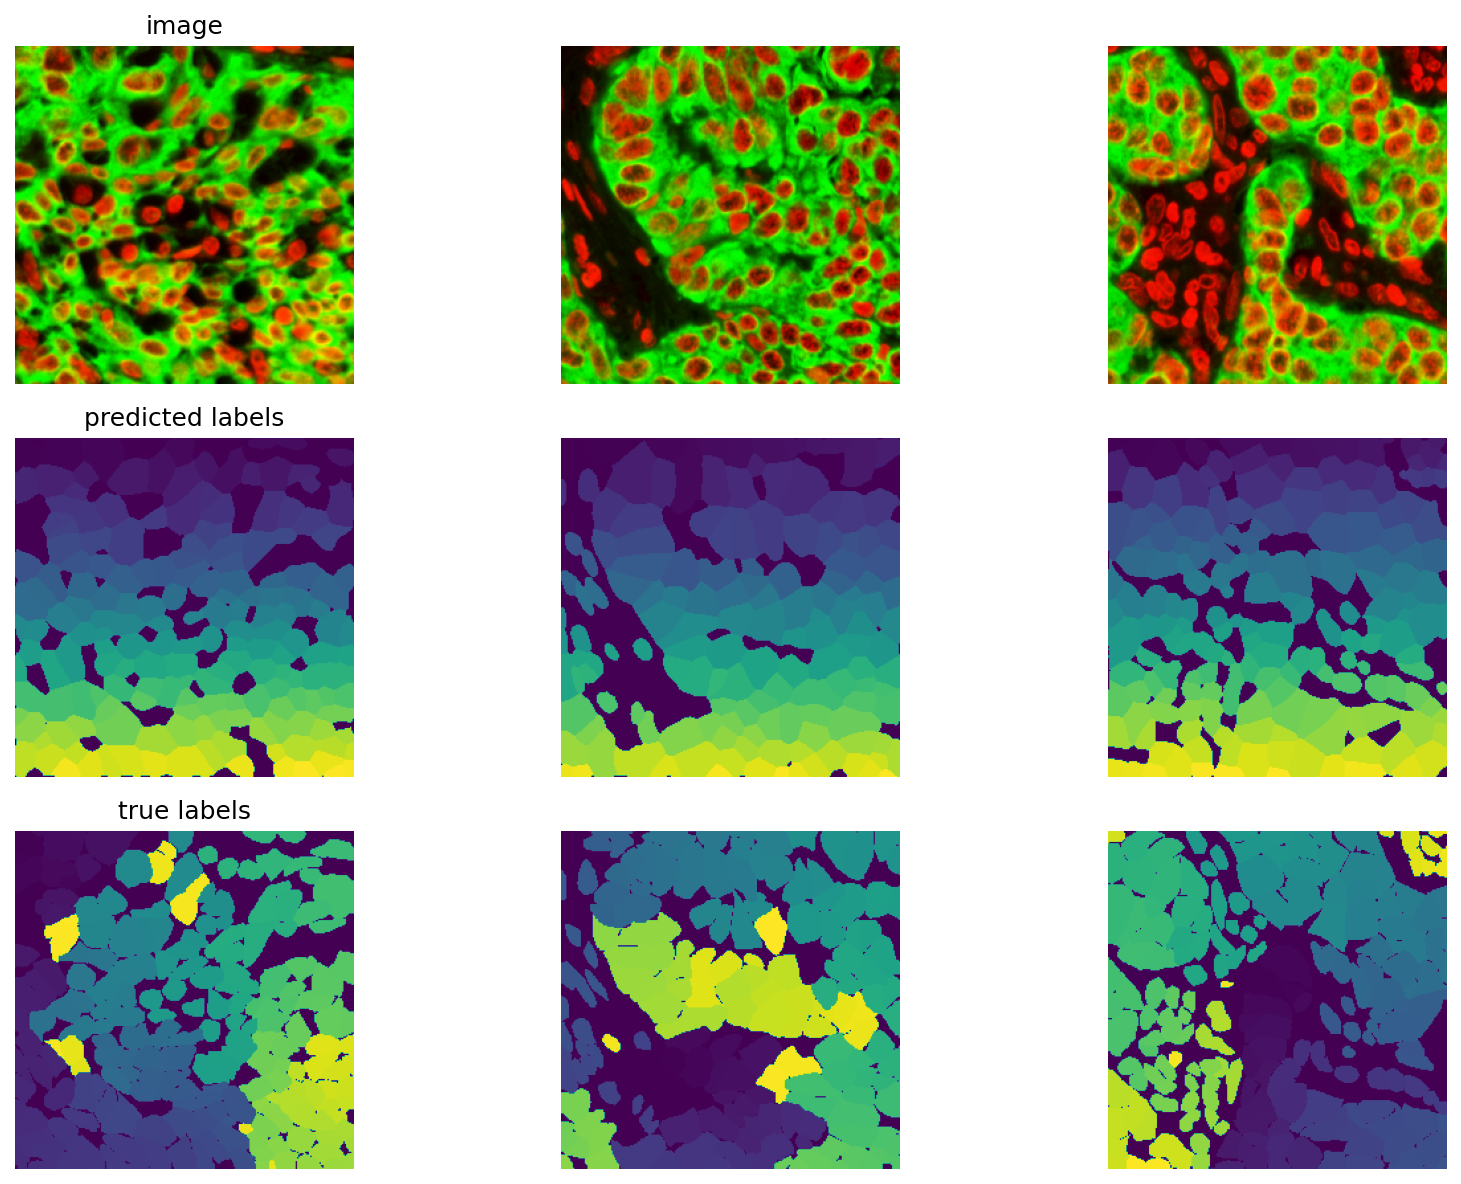

In [22]:
plt.figure(figsize=(12,8), dpi=150)
for k,im in enumerate(test_data):
    img = im.copy()
    plt.subplot(3,len(test_data), k+1)
    img = np.vstack((img, np.zeros_like(img)[:1]))
    img = img.transpose(1,2,0)
    plt.imshow(img)
    plt.axis('off')
    if k==0:
        plt.title('image')

    plt.subplot(3,len(test_data), len(test_data) + k+1)
    plt.imshow(masks[k])
    plt.axis('off')
    if k==0:
        plt.title('predicted labels')

    plt.subplot(3,len(test_data), 2*len(test_data) + k+1)
    plt.imshow(test_labels[k])
    plt.axis('off')
    if k==0:
        plt.title('true labels')
plt.tight_layout()

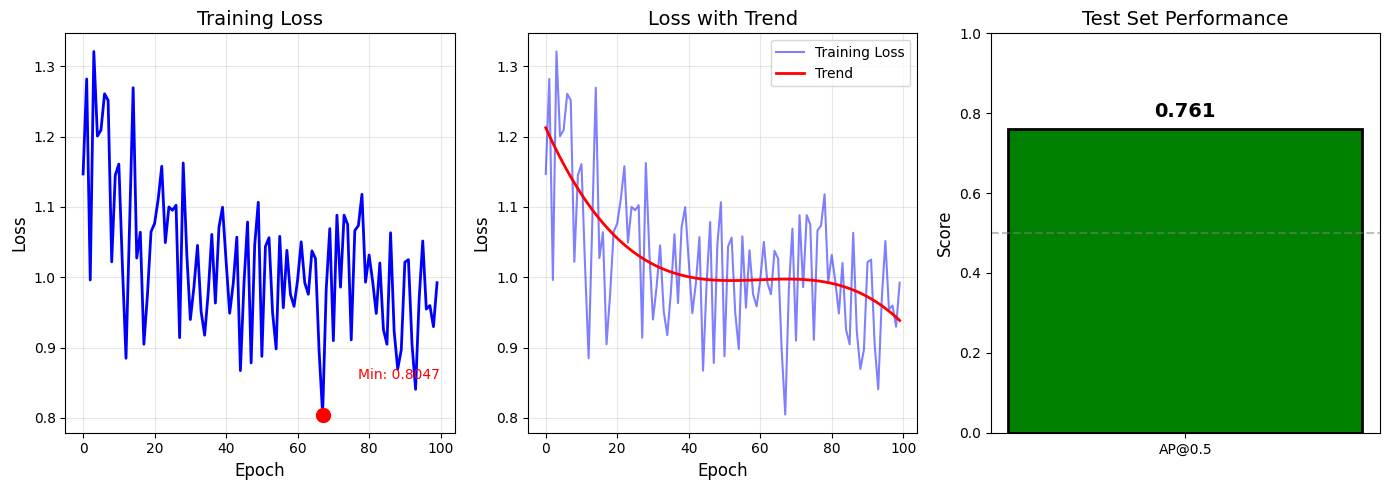


                    TRAINING RESULTS SUMMARY
  Training Configuration:
    • Epochs:        100
    • Learning Rate: 1e-05
    • Batch Size:    1
    • Train Images:  5
  Loss Metrics:
    • Initial Loss:  1.1469
    • Final Loss:    0.9922
    • Minimum Loss:  0.8047 (Epoch 67)
    • Improvement:   13.49%
  Test Performance:
    • Average Precision @ IoU=0.5: 0.761 (76.1%)


In [23]:
# Complete visualization: Loss + Final Accuracy

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(14, 5))

# Plot 1: Training Loss Curve
ax1 = fig.add_subplot(1, 3, 1)
epochs = np.arange(0, len(train_losses))
ax1.plot(epochs, train_losses, 'b-', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Training Loss', fontsize=14)
ax1.grid(True, alpha=0.3)

# Highlight min loss point
min_idx = np.argmin(train_losses)
ax1.scatter([min_idx], [train_losses[min_idx]], color='red', s=100, zorder=5)
ax1.annotate(f'Min: {train_losses[min_idx]:.4f}',
            xy=(min_idx, train_losses[min_idx]),
            xytext=(min_idx + 10, train_losses[min_idx] + 0.05),
            fontsize=10, color='red')

# Plot 2: Loss with trend line
ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(epochs, train_losses, 'b-', alpha=0.5, label='Training Loss')
# Add polynomial trend line
z = np.polyfit(epochs, train_losses, 3)
p = np.poly1d(z)
ax2.plot(epochs, p(epochs), 'r-', linewidth=2, label='Trend')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.set_title('Loss with Trend', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Final Metrics Bar Chart
ax3 = fig.add_subplot(1, 3, 3)
metrics = ['AP@0.5']
values = [ap[:,0].mean()]  # Average Precision from evaluation
colors = ['green' if v > 0.7 else 'orange' if v > 0.5 else 'red' for v in values]       
bars = ax3.bar(metrics, values, color=colors, edgecolor='black', linewidth=2)
ax3.set_ylim(0, 1)
ax3.set_ylabel('Score', fontsize=12)
ax3.set_title('Test Set Performance', fontsize=14)
ax3.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Threshold')

# Add value labels on bars
for bar, val in zip(bars, values):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
            f'{val:.3f}', ha='center', va='bottom', fontsize=14, fontweight='bold')    

plt.tight_layout()
plt.savefig('training_results.png', dpi=150, bbox_inches='tight')
plt.show()

# Print detailed summary
print(f"\n{'='*60}")
print(f"                    TRAINING RESULTS SUMMARY")
print(f"{'='*60}")
print(f"  Training Configuration:")
print(f"    • Epochs:        {n_epochs}")
print(f"    • Learning Rate: {learning_rate}")
print(f"    • Batch Size:    {batch_size}")
print(f"    • Train Images:  {len(train_data)}")
print(f"{'='*60}")
print(f"  Loss Metrics:")
print(f"    • Initial Loss:  {train_losses[0]:.4f}")
print(f"    • Final Loss:    {train_losses[-1]:.4f}")
print(f"    • Minimum Loss:  {min(train_losses):.4f} (Epoch {np.argmin(train_losses)})")
print(f"    • Improvement:   {((train_losses[0] - train_losses[-1]) / train_losses[0] * 100):.2f}%")
print(f"{'='*60}")
print(f"  Test Performance:")
print(f"    • Average Precision @ IoU=0.5: {ap[:,0].mean():.3f} ({ap[:,0].mean()*100:.1f}%)")
print(f"{'='*60}")